# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[1])

606
victoria


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#response = requests.get(query_url + cities[1]).json()
response = requests.get(query_url + "Paris").json()
city_city = []
city_lon = []
city_lat = []
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []

In [4]:
for city in range(len(cities)):
    time.sleep(1)
    try:
        response = requests.get(query_url + cities[city]).json()
        print(f"City Number {city}: {cities[city]}")
        city_lon.append(response["coord"]['lon'])
        city_lat.append(response["coord"]['lat'])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloudiness.append(response["clouds"]["all"])
        city_windspeed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response['dt'])
        city_city.append(cities[city])
    except:
        print("City Not Found")

City Number 0: bredasdorp
City Number 1: victoria
City Number 2: cherskiy
City Number 3: castro
City Number 4: helong
City Number 5: busselton
City Number 6: norman wells
City Number 7: fairbanks
City Number 8: channel-port aux basques
City Number 9: belushya guba
City Not Found
City Number 10: avarua
City Number 11: coffs harbour
City Number 12: tiksi
City Number 13: talnakh
City Number 14: sanandaj
City Number 15: khatanga
City Number 16: troitsko-pechorsk
City Number 17: hambantota
City Number 18: horta
City Number 19: hasaki
City Number 20: jardim
City Number 21: punta arenas
City Number 22: qaanaaq
City Number 23: saldanha
City Number 24: thompson
City Number 25: longyearbyen
City Number 26: port hedland
City Number 27: hermanus
City Number 28: tsihombe
City Not Found
City Number 29: arraial do cabo
City Number 30: attawapiskat
City Not Found
City Number 31: asyut
City Number 32: rio gallegos
City Number 33: palabuhanratu
City Not Found
City Number 34: mahebourg
City Number 35: ho

City Number 299: sinop
City Number 300: nanortalik
City Number 301: haicheng
City Number 302: lakes entrance
City Number 303: muros
City Number 304: lolua
City Not Found
City Number 305: hami
City Number 306: nome
City Number 307: korcula
City Number 308: san quintin
City Number 309: bambari
City Number 310: tiznit
City Number 311: lethem
City Number 312: grand river south east
City Not Found
City Number 313: pinega
City Number 314: dwarka
City Number 315: savona
City Number 316: oriximina
City Number 317: mount gambier
City Number 318: east london
City Number 319: saint-georges
City Number 320: lorengau
City Number 321: vestmannaeyjar
City Number 322: katsuura
City Number 323: rongcheng
City Number 324: tuy hoa
City Number 325: urdoma
City Number 326: vilya
City Number 327: lagoa
City Number 328: esperance
City Number 329: mayo
City Number 330: faanui
City Number 331: araouane
City Number 332: tarquinia
City Number 333: jibuti
City Number 334: panorama
City Number 335: christchurch
Ci

City Number 599: tual
City Number 600: vallenar
City Number 601: palmer
City Number 602: moerai
City Number 603: houma
City Number 604: mahon
City Number 605: fare


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_lon

[20.0403,
 114.1577,
 161.3,
 -50.0119,
 128.9972,
 115.3333,
 -126.8329,
 -147.7164,
 -59.1367,
 -159.775,
 153.1333,
 128.8694,
 88.3972,
 46.9923,
 102.5,
 56.1964,
 81.1185,
 -28.6333,
 140.8333,
 -56.1381,
 -70.9167,
 -69.3632,
 17.9442,
 -97.8558,
 15.6401,
 118.5667,
 19.2345,
 -42.0278,
 31.1837,
 -69.2181,
 57.7,
 147.3294,
 -133.0374,
 -99.8901,
 -149.15,
 168.8643,
 130.9889,
 -156.7887,
 -56.1549,
 -7.3528,
 18.4232,
 -68.3,
 -91.7668,
 -173.3,
 -76.2333,
 -152.4072,
 -122.4869,
 57.5167,
 82.35,
 -58.4442,
 79.5667,
 -42.7503,
 87.7333,
 -134.9692,
 158.6167,
 173.1667,
 35.0333,
 -17.9182,
 113.6333,
 168.3333,
 -73.9662,
 108.0108,
 -65.7125,
 147.0587,
 -44.3586,
 -110.6974,
 70.8333,
 91.3903,
 124.8,
 124.8455,
 14.5053,
 80.5464,
 -39.2481,
 -23.7142,
 100.3354,
 -159.319,
 140.5894,
 39.8261,
 167.6833,
 -76.7833,
 147.9167,
 100.3543,
 89.3011,
 18.705,
 -139.0333,
 -155.09,
 122.6711,
 -23.5087,
 23.4895,
 -79.2353,
 141.9667,
 -2.2405,
 -124.1573,
 33.6667,
 -77.

In [6]:
city_info_df = pd.DataFrame({"City": city_city,
                             "Lat": city_lat,
                             "Lng": city_lon,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_cloudiness,
                             "Wind Speed": city_windspeed,
                             "Country": city_country,
                             "Date": city_date
                             })
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,64.40,88,0,1.14,ZA,1613274772
1,victoria,22.2855,114.1577,72.00,64,0,1.01,HK,1613274480
2,cherskiy,68.7500,161.3000,-4.49,86,100,8.84,RU,1613274774
3,castro,-24.7911,-50.0119,62.04,95,1,3.22,BR,1613274776
4,helong,42.5397,128.9972,34.16,89,100,4.09,CN,1613274777
...,...,...,...,...,...,...,...,...,...
559,palmer,42.1584,-72.3287,27.00,59,90,4.61,US,1613275473
560,moerai,-22.4333,-151.3333,82.71,64,0,5.70,PF,1613275474
561,houma,29.5958,-90.7195,42.80,81,90,10.36,US,1613275475
562,mahon,39.8885,4.2658,50.00,71,75,12.66,ES,1613275241


In [7]:
city_info_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_city_data = city_info_df[city_info_df["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,64.40,88,0,1.14,ZA,1613274772
1,victoria,22.2855,114.1577,72.00,64,0,1.01,HK,1613274480
2,cherskiy,68.7500,161.3000,-4.49,86,100,8.84,RU,1613274774
3,castro,-24.7911,-50.0119,62.04,95,1,3.22,BR,1613274776
4,helong,42.5397,128.9972,34.16,89,100,4.09,CN,1613274777
...,...,...,...,...,...,...,...,...,...
559,palmer,42.1584,-72.3287,27.00,59,90,4.61,US,1613275473
560,moerai,-22.4333,-151.3333,82.71,64,0,5.70,PF,1613275474
561,houma,29.5958,-90.7195,42.80,81,90,10.36,US,1613275475
562,mahon,39.8885,4.2658,50.00,71,75,12.66,ES,1613275241


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_over_100 = city_info_df[city_info_df["Humidity"]>100].index.values.tolist()
humid_over_100

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Already done above
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,64.40,88,0,1.14,ZA,1613274772
1,victoria,22.2855,114.1577,72.00,64,0,1.01,HK,1613274480
2,cherskiy,68.7500,161.3000,-4.49,86,100,8.84,RU,1613274774
3,castro,-24.7911,-50.0119,62.04,95,1,3.22,BR,1613274776
4,helong,42.5397,128.9972,34.16,89,100,4.09,CN,1613274777
...,...,...,...,...,...,...,...,...,...
559,palmer,42.1584,-72.3287,27.00,59,90,4.61,US,1613275473
560,moerai,-22.4333,-151.3333,82.71,64,0,5.70,PF,1613275474
561,houma,29.5958,-90.7195,42.80,81,90,10.36,US,1613275475
562,mahon,39.8885,4.2658,50.00,71,75,12.66,ES,1613275241


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

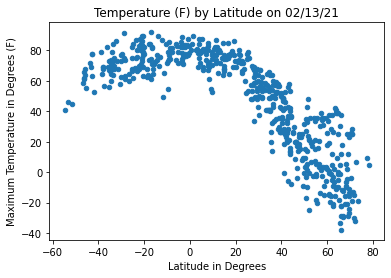

In [11]:
today_date=datetime.today().strftime('%m/%d/%y')
latvstemp=clean_city_data.plot.scatter("Lat","Max Temp", title=(f"Temperature (F) by Latitude on {today_date}"))
latvstemp.set_xlabel("Latitude in Degrees")
latvstemp.set_ylabel("Maximum Temperature in Degrees (F)")
plt.savefig("../output_data/Vacation Figures/latvstemp.png")

### In this graph, it is measuring maximum temperature by degrees of latitude. As we can see, there is a clear correlation between the two. As the latitude gets farther from zero, the temperature decreases, while the temperatures around 0 degrees latitude are much hotter

## Latitude vs. Humidity Plot

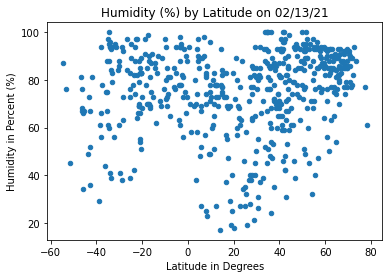

In [12]:
latvshum=clean_city_data.plot.scatter("Lat","Humidity", title=(f"Humidity (%) by Latitude on {today_date}"))
latvshum.set_xlabel("Latitude in Degrees")
latvshum.set_ylabel("Humidity in Percent (%)")
plt.savefig("../output_data/Vacation Figures/latvshum.png")

### Here, it is measuring humidity against latitude. There is not as clear of a correlation this time, but still some. The latitudes near 0 have humidities that are higher. Specifically, the lattitudes between -15 and 5 have no humidities below 60%. All the other latitudes are very inconsistent.

## Latitude vs. Cloudiness Plot

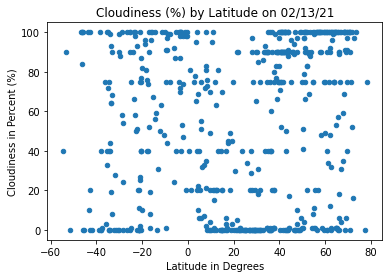

In [13]:
latvscloud=clean_city_data.plot.scatter("Lat","Cloudiness", title=(f"Cloudiness (%) by Latitude on {today_date}"))
latvscloud.set_xlabel("Latitude in Degrees")
latvscloud.set_ylabel("Cloudiness in Percent (%)")
plt.savefig("../output_data/Vacation Figures/latvscloud.png")

### This graph is measuring cloudiness by latitude. There is no correlation I can see, but the majority of cloudiness percentages (regardless of latitude) are either 0% or 100%. "Partly cloudy" doesn't seem as common.

## Latitude vs. Wind Speed Plot

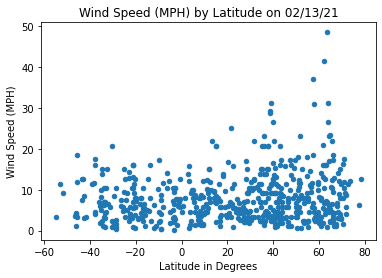

In [14]:
latvswind=clean_city_data.plot.scatter("Lat","Wind Speed", title=(f"Wind Speed (MPH) by Latitude on {today_date}"))
latvswind.set_xlabel("Latitude in Degrees")
latvswind.set_ylabel("Wind Speed (MPH)")
plt.savefig("../output_data/Vacation Figures/latvswind.png")

### This graph shows wind speed versus latitude. The clearest correlation on this graph is that the northern latitudes (>=40 degrees) have potential for very high winds. All the other latitudes have wind speeds <= 25 MPH.

## Linear Regression

In [15]:
#northern hemisphere
clean_north = clean_city_data[clean_city_data["Lat"]>0]
#southern hemisphere
clean_south = clean_city_data[clean_city_data["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

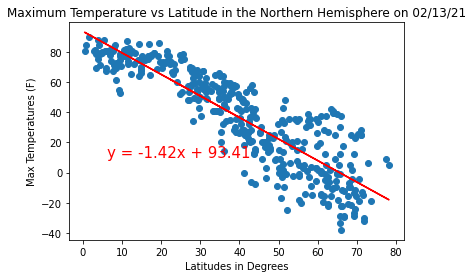

In [16]:
x_values = clean_north['Lat']
y_values = clean_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Max Temperatures (F)')
plt.title(f"Maximum Temperature vs Latitude in the Northern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvstempnorthregress.png")
plt.show()

### Here, we can see a clear negative correlation between northern latitude and temperature. As we go more north, it gets colder.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

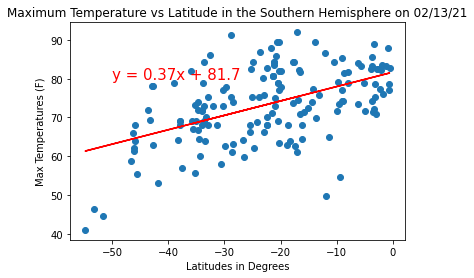

In [17]:
x_values = clean_south['Lat']
y_values = clean_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Max Temperatures (F)')
plt.title(f"Maximum Temperature vs Latitude in the Southern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvstempSouthRegress.png")
plt.show()

### Here, we see a positive correlation between latitude in the southern hemisphere and temperature. As we go more north towards the equator, it gets warmer

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

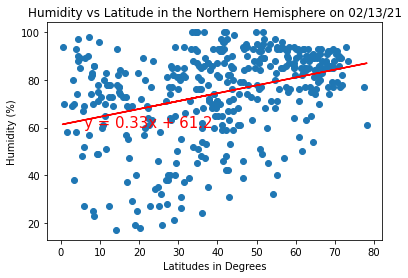

In [18]:
x_values = clean_north['Lat']
y_values = clean_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,60),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Humidity (%)')
plt.title(f"Humidity vs Latitude in the Northern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvshumNorthRegress.png")
plt.show()

### Here, we see a positive correlation between humidity and latitude in the northern hemisphere. It gets more humid as we go North. This surprises me.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

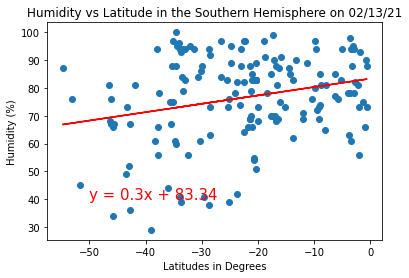

In [19]:
x_values = clean_south['Lat']
y_values = clean_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Humidity (%)')
plt.title(f"Humidity vs Latitude in the Southern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvshumSouthRegress.png")
plt.show()

### Here, we see a positive correlation between humidity and latitude in the southern hemisphere. As we go north towards the equator, it gets more humid. This does not surprise me.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

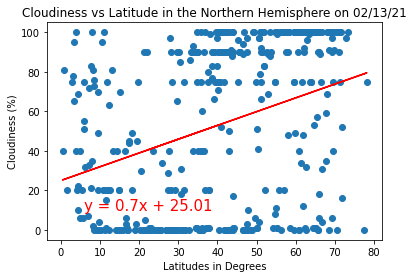

In [20]:
x_values = clean_north['Lat']
y_values = clean_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Cloudiness (%)')
plt.title(f"Cloudiness vs Latitude in the Northern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvscloudNorthRegress.png")
plt.show()

### This graph shows as we go north in the northern hemisphere, it gets cloudier

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

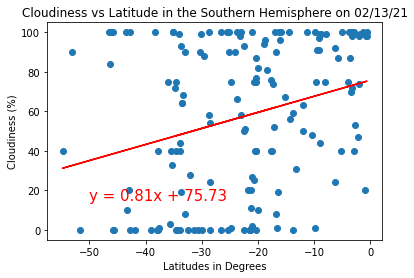

In [21]:
x_values = clean_south['Lat']
y_values = clean_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Cloudiness (%)')
plt.title(f"Cloudiness vs Latitude in the Southern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvscloudSouthRegress.png")
plt.show()

### This graph shows as we go North in the southern hemisphere, it gets cloudier

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

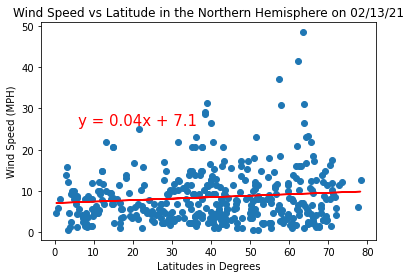

In [22]:
x_values = clean_north['Lat']
y_values = clean_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,26),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Wind Speed vs Latitude in the Northern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvswindNorthRegress.png")
plt.show()

### This graph shows there is almost no correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

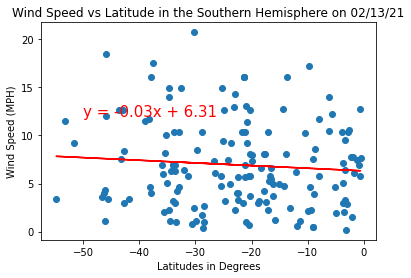

In [23]:
x_values = clean_south['Lat']
y_values = clean_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Wind Speed vs Latitude in the Southern Hemisphere on {today_date}")
plt.savefig("../output_data/Vacation Figures/latvswindSouthRegress.png")
plt.show()

### This graph shows there is a small negative correlation between latitude and wind speed in the southern hemisphere. As we get closer to the equator, it gets sunnier

# Final Observations
### 1: Temperature clearly gets hotter towards the equator. 
### 2: The temperature increase is less strong in the southern hemisphere, as the coefficient is 0.26 as opposed to the northern hemisphere which is -1.48. 
### 3: There is a positive trend between latitude and cloudiness in the southern hemisphere, meaning it is sunnier towards the equator than near the South Pole